In [1]:
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 6,4
rcParams['font.size'] = 15
sns.set()
np.random.seed(8)

# T Test

Hypotheses:
 - H0: De gemiddelde ranking van een website met META titel is gelijk aan die zonder een META titel
 - HA: De gemiddelde ranking van een website met META titel is ongelijk aan die zonder een META titel (scoort hoger of lager)
 - H0: De gemiddelde ranking van een website met META beschrijving is gelijk aan die zonder een META beschrijving
 - HA: De gemiddelde ranking van een website met META beschrijving is ongelijk aan die zonder een META beschrijving (scoort hoger of lager)

In [3]:
df = pd.read_csv('50ColDF.csv')
df.head()

,Number,Dn,Ur,Keyword,Kd,HeaderCount,ListsCount,InternalLinksSoup,ExternalLinksSoup,InternalLinksSEMrush,ExternalLinksSEMrush,BacklinksSEMrush,Total Images,Image Tags,Content-length,META-Title,META-Description,Creation Date
0,0,bouwmaat.nl,https://www.bouwmaat.nl/bouwmaterialen,bouwmaterialen,82.48,4.0,31.0,1426.0,10.0,43.0,77.0,6884.0,23,"['None', 'None', 'None', 'None', 'None', 'None...",753,Bouwmaterialen kopen: Online of in de vestigin...,Bouwmaterialen kopen ✓ Online of in de vestigi...,None
1,1,hornbach.nl,https://www.hornbach.nl/shop/Bouwmateriaal/S44...,bouwmaterialen,82.48,10.0,17.0,217.0,7.0,42.0,79.0,633.0,21,"['Hornbach logo', 'Assortiment Binnenafbouw', ...",367,Bouwmaterialen kopen? .HORNBACH. Laagste prijs,Bekijk ons assortiment Bouwmateriaal in onze ...,None
2,2,bouwbestel.nl,https://www.bouwbestel.nl/bouwmaterialen.html,bouwmaterialen,82.48,2.0,7.0,2595.0,14.0,128.0,19.0,12.0,57,"['Uniebouw', 'None', 'None', 'None', 'None', '...",252,Bouwmaterialen Online - Bouwbestel - Bouwmater...,Op zoek naar bouwmaterialen? Bij Bouwbestel be...,None
3,3,online-bouwmaterialen.nl,https://www.online-bouwmaterialen.nl/,bouwmaterialen,82.48,3.0,31.0,138.0,10.0,2.0,2.0,36.0,52,"['Online Bouwmaterialen, bestel bouwmaterialen...",1782,Bouwmaterialen Online kopen? | Online Bouwmate...,Bij Online Bouwmaterialen koopt u de beste kwa...,None
4,4,bmn.nl,https://www.bmn.nl/,bouwmaterialen,82.48,3.0,12.0,563.0,5.0,150.0,178.0,12.0,46,"['BMN Bouwmaterialen', 'BMN Bouwmaterialen', '...",175,BMN Bouwmaterialen groothandel - BMN Bouwmater...,BMN (Bouwmaterialen Nederland) is de bouwmater...,None


### Hypothese: websites met META titel hebben gemiddeld een hogere rank dan websites zonder META titel

In [4]:
no_title = df[df['META-Title'].isnull()]
title = df[df['META-Title'].notnull()]

In [5]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

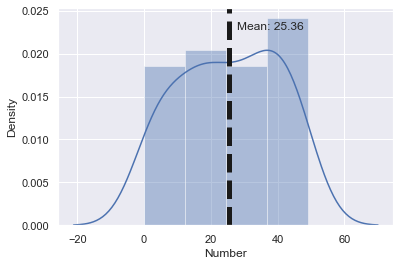

In [6]:
plot_distribution(title['Number'])

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

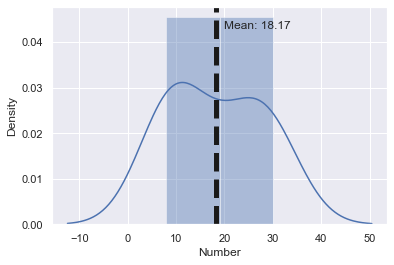

In [7]:
plot_distribution(no_title['Number'])

In [8]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [9]:
sample_size = 6
title_sampled = np.random.choice(title['Number'], sample_size)
no_title_sampled = np.random.choice(no_title['Number'], sample_size)
compare_2_groups(title_sampled, no_title_sampled, 0.05, sample_size)

Statistics=-0.101, p=0.922
Same distributions (fail to reject H0)


### Conclusie: Het ontbreken van een META titel lijkt niet significant te zijn

### Hypothese: websites met META beschrijving hebben gemiddeld een hogere rank dan websites zonder META beschrijving

In [10]:
no_description = df[df['META-Description'].isnull()]
description = df[df['META-Description'].notnull()]

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

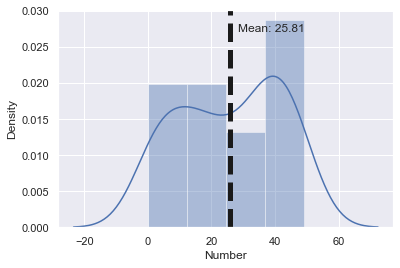

In [11]:
plot_distribution(description['Number'])

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

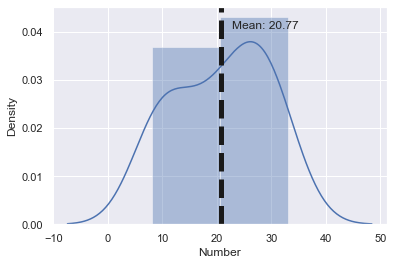

In [12]:
plot_distribution(no_description['Number'])

In [13]:
sample_size = 10
description_sampled = np.random.choice(description['Number'], sample_size)
no_description_sampled = np.random.choice(no_description['Number'], sample_size)
compare_2_groups(description_sampled, no_description_sampled, 0.05, sample_size)

Statistics=1.073, p=0.297
Same distributions (fail to reject H0)


### Conclusie: Het ontbreken van een META beschrijving lijkt niet significant te zijn